In [ ]:
import numpy as np
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Crop_recommendation')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,98,47,37,23.483813,81.332651,7.375483,224.058116,rice
1,66,53,41,25.075635,80.523891,7.778915,257.003887,rice
2,97,59,43,26.359272,84.044036,6.286500,271.358614,rice
3,97,50,41,24.529227,80.544986,7.070960,260.263403,rice
4,60,49,44,20.775761,84.497744,6.244841,240.081065,rice


In [ ]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum()) #for finding null values in the following dataset.
print('\nUnique values :  \n',df.nunique())
print('\nStatical Measure of the data set   :\n',df.describe()) # Statically computed values of the dataset.

Rows     : 2176
Columns  : 8

Features :
     : ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

Missing values    : 0

Unique values :  
 N               137
P               117
K                73
temperature    2176
humidity       2176
ph             2176
rainfall       2176
label            22
dtype: int64

Statical Measure of the data set   :
                 N            P  ...           ph     rainfall
count  2176.00000  2176.000000  ...  2176.000000  2176.000000
mean     50.21875    53.431526  ...     6.469472   101.984235
std      36.96639    33.149177  ...     0.774208    53.328066
min       0.00000     5.000000  ...     3.504752    20.211267
25%      21.00000    28.000000  ...     5.972172    64.251016
50%      37.00000    51.000000  ...     6.424285    94.320318
75%      84.00000    68.000000  ...     6.920131   122.047254
max     140.00000   145.000000  ...     9.935091   298.560117

[8 rows x 7 columns]


In [ ]:
df['label'].unique() #22 types of label


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df['label'].value_counts() 

coconut        100
mothbeans      100
pigeonpeas     100
cotton         100
mungbean       100
muskmelon      100
watermelon     100
kidneybeans    100
banana         100
blackgram      100
papaya         100
coffee         100
lentil         100
orange         100
pomegranate    100
jute           100
chickpea       100
grapes         100
apple          100
maize          100
mango          100
rice            76
Name: label, dtype: int64

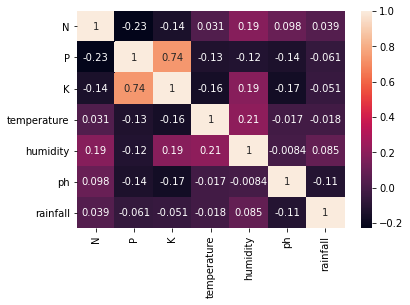

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea718f69d0>,
      dtype=object)

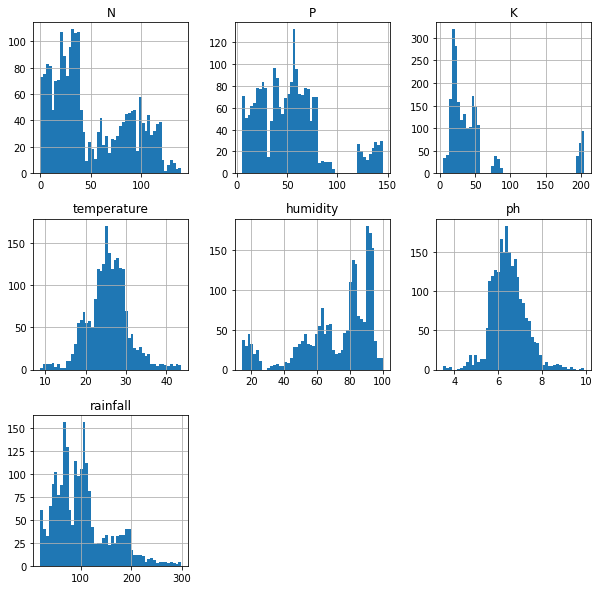

In [ ]:
import matplotlib.pyplot as plt  
df.hist(bins=50, figsize=(10,10))

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [ ]:


acc = []
model = []



In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)



Decision Tree


In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  92.20183486238533
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        23
   blackgram       0.65      1.00      0.79        15
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        20
      coffee       0.94      0.85      0.89        20
      cotton       0.96      1.00      0.98        23
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.27      0.42        26
 kidneybeans       1.00      0.89      0.94        19
      lentil       0.96      1.00      0.98        22
       maize       0.85      0.85      0.85        20
       mango       1.00      0.93      0.96        29
   mothbeans       1.00      0.72      0.84        18
    mungbean       1.00      1.00      1.00        18
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00